<a href="https://colab.research.google.com/github/Harika822/projects/blob/master/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ImageNet is a project which aims to provide a large image database for research purposes. It contains more than 14 million images which belong to more than 20,000 classes ( or synsets ). They also provide bounding box annotations for around 1 million images, which can be used in Object Localization tasks

Keras comes bundled with many models. A trained model has two parts – Model Architecture and Model Weights. The weights are large files and thus they are not bundled with Keras. However, the weights file is automatically downloaded ( one-time ) if you specify that you want to load the weights trained on ImageNet data. It has the following models ( as of Keras version 2.1.2 ):

    VGG16,
    InceptionV3,
    ResNet,
    MobileNet,
    Xception,
    InceptionResNetV2

Loading a Model in Keras

We can load the models in Keras using the following code

In [ ]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In the above code, we first import the python module containing the respective models. Then we load the model architecture and the imagenet weights for the networks. If you don’t want to initialize the network with imagenet weights, replace ‘imagenet’ with None

Load the image. This is done using the load_img() function. Keras uses the PIL format for loading images. Thus, the image is in width x height x channels format.
Convert the image from PIL format to Numpy format ( height x width x channels ) using image_to_array() function.
The networks accept a 4-dimensional Tensor as an input of the form ( batchsize, height, width, channels). This is done using the expand_dims() function in Numpy.

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

PIL image size of 1st Image (224, 224)


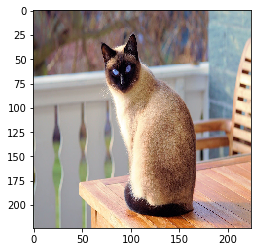

In [ ]:
filename1 = 'scat.jpg'
# load an image in PIL format
original_1 = load_img(filename1, target_size=(224, 224))
print('PIL image size of 1st Image',original_1.size)
plt.imshow(original_1)
plt.show()


PIL image size of 2nd Image (224, 224)


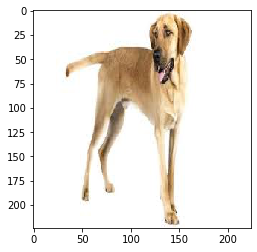

In [ ]:
filename2 = 'dog.jpg'
original_2 = load_img(filename2, target_size=(224, 224))
print('PIL image size of 2nd Image',original_2.size)
plt.imshow(original_2)
plt.show()



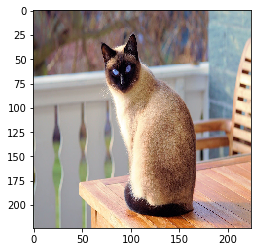

In [ ]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image1 = img_to_array(original_1)
plt.imshow(np.uint8(numpy_image1))

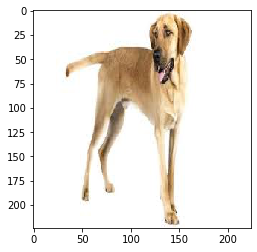

numpy array size (224, 224, 3)
numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
image batch size (1, 224, 224, 3)


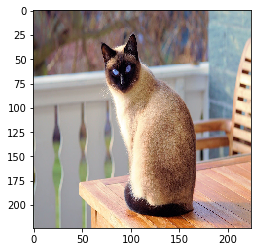

In [ ]:
numpy_image2 = img_to_array(original_2)
plt.imshow(np.uint8(numpy_image2))
plt.show()
print('numpy array size',numpy_image1.shape)
print('numpy array size',numpy_image2.shape) 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch1 = np.expand_dims(numpy_image1, axis=0)
image_batch2 = np.expand_dims(numpy_image2, axis=0)
print('image batch size', image_batch1.shape)
print('image batch size', image_batch2.shape)
plt.imshow(np.uint8(image_batch[0]))

In [ ]:
# prepare the image for the VGG model
processed_image1 = vgg16.preprocess_input(image_batch1.copy())
processed_image2 = vgg16.preprocess_input(image_batch2.copy())
 
# get the predicted probabilities for each class
predictions1 = vgg_model.predict(processed_image1)
predictions2 = vgg_model.predict(processed_image2)

# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_cat = decode_predictions(predictions1)
label_dog = decode_predictions(predictions2)

print(label_cat)
print(label_dog)


[[('n02123597', 'Siamese_cat', 0.99676764), ('n02124075', 'Egyptian_cat', 0.0025658477), ('n02127052', 'lynx', 0.00019529706), ('n02105162', 'malinois', 0.00015825112), ('n02125311', 'cougar', 5.865229e-05)]]
[[('n02091831', 'Saluki', 0.7300796), ('n02109047', 'Great_Dane', 0.18336135), ('n02087394', 'Rhodesian_ridgeback', 0.025296228), ('n02090379', 'redbone', 0.010144322), ('n02091134', 'whippet', 0.009944253)]]


In [ ]:
# prepare the image for the Resnet model
processed_image3 = resnet50.preprocess_input(image_batch1.copy())
processed_image4 = resnet50.preprocess_input(image_batch2.copy()) 
# get the predicted probabilities for each class
predictions3 = resnet_model.predict(processed_image3)
predictions4 = resnet_model.predict(processed_image4)


# print predictions

# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_cat_i = decode_predictions(predictions3)
label_dog_i = decode_predictions(predictions4)
print(label_cat_i)
print(label_dog_i)

[[('n02123597', 'Siamese_cat', 0.98247844), ('n02124075', 'Egyptian_cat', 0.0032298346), ('n02497673', 'Madagascar_cat', 0.0015788494), ('n02127052', 'lynx', 0.00057220843), ('n03887697', 'paper_towel', 0.00052609947)]]
[[('n02091831', 'Saluki', 0.5898745), ('n02109047', 'Great_Dane', 0.2976225), ('n02091134', 'whippet', 0.024431577), ('n02090721', 'Irish_wolfhound', 0.019817699), ('n02099601', 'golden_retriever', 0.010778591)]]


Example#2 - Below Example shows the sample dataset from KERAS - CIFAR10. How to display the images from CIFAR10

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


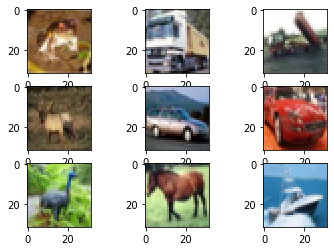

In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()